# <center>Topic 2. Visual data analysis in Python
## <center>Part 1. Visualization: from Simple Distributions to Dimensionality Reduction


# <center>Тема 2. Визуальный анализ данных в Python
## <center>Часть 1. Визуализация: от простых распределений к уменьшению размерности

В области машинного обучения *визуализация данных* — это не просто создание красивой графики для отчетов; он широко используется в повседневной работе на всех этапах проекта.

Начнем с того, что визуальное исследование данных — это первое, что человек делает при решении новой задачи. Мы проводим предварительные проверки и анализ, используя графики и таблицы, чтобы обобщить данные и исключить менее важные детали. Нам, людям, гораздо удобнее так уловить главное, чем читать множество строк необработанных данных. Удивительно, сколько информации можно получить из, казалось бы, простых диаграмм, созданных с помощью доступных инструментов визуализации.

Далее, когда мы анализируем производительность модели или результаты отчета, мы также часто используем диаграммы и изображения. Иногда для интерпретации сложной модели нам необходимо спроецировать многомерные пространства на более визуально понятные 2D или 3D фигуры.

В целом визуализация — это относительно быстрый способ узнать что-то новое о ваших данных. Таким образом, крайне важно изучить наиболее полезные методы и сделать их частью своего повседневного набора инструментов ML.

В этой статье мы собираемся получить практический опыт визуального исследования данных с использованием популярных библиотек, таких как `pandas`, `matplotlib` и `seaborn`.

### Article outline

1. [Dataset](#1.-Dataset)
2. [Univariate visualization](#2.-Univariate-visualization)
    * 2.1 [Quantitative features](#2.1-Quantitative-features)
    * 2.2 [Categorical and binary features](#2.2-Categorical-and-binary-features)
3. [Multivariate visualization](#3.-Multivariate-visualization)
    * 3.1 [Quantitative vs. Quantitative](#3.1-Quantitative-vs.-Quantitative)
    * 3.2 [Quantitative vs. Categorical](#3.2-Quantitative-vs.-Categorical)
    * 3.3 [Categorical vs. Categorical](#3.3-Categorical-vs.-Categorical)
4. [Whole dataset visualizations](#4.-Whole-dataset-visualizations)
    * 4.1 [Naive approach](#4.1-A-naive-approach)
    * 4.2 [Dimensionality reduction](#4.2-Dimensionality-reduction)
    * 4.3 [t-SNE](#4.3-t-SNE)
5. [Demo assignment](#6.-Demo-assignment)
6. [Useful resources](#6.-Useful-resources)



### Краткое содержание статьи

1. [Набор данных] (#1.-Набор данных)
2. [Одномерная визуализация](#2.-Одномерная-визуализация)
     * 2.1 [Количественные характеристики](#2.1-Количественные-характеристики)
     * 2.2 [Категорические и бинарные функции] (#2.2-Категорические и бинарные функции)
3. [Многовариантная визуализация](#3.-Многовариантная-визуализация)
     * 3.1 [Количественный против количественного] (#3.1-Количественный против количественного)
     * 3.2 [Количественные и категориальные] (#3.2-Количественные и категориальные)
     * 3.3 [Категорические против Категориальных] (#3.3-Категорические против Категориальных)
4. [Визуализации всего набора данных] (#4.-Визуализации всего набора данных)
     * 4.1 [Наивный подход] (#4.1-Наивный-подход)
     * 4.2 [Уменьшение размерности] (#4.2-Уменьшение размерности)
     * 4,3 [т-СНЭ](#4.3-т-СНЭ)
5. [Демо-задание](#6.-Демо-задание)
6. [Полезные ресурсы](№6.-Полезные ресурсы)

## 1. Dataset

Прежде чем мы перейдем к данным, давайте инициализируем нашу среду:

In [6]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

В первой статье мы рассмотрели данные об оттоке клиентов у оператора связи. Мы перезагрузим тот же набор данных в `DataFrame`:

In [7]:
df = pd.read_csv("telecom_churn.csv")

Чтобы познакомиться с нашими данными, давайте посмотрим на первые 5 записей с помощью `head()`:

In [8]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

Here is the description of our features:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | State abbreviation (like KS = Kansas) | String | Categorical |
| **Account length** | How long the client has been with the company | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | International plan (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Number of voicemail messages | Numerical | Quantitative |
| **Total day minutes** |  Total duration of daytime calls | Numerical | Quantitative |
| **Total day calls** | Total number of daytime calls  | Numerical | Quantitative |
| **Total day charge** | Total charge for daytime services | Numerical | Quantitative |
| **Total eve minutes** | Total duration of evening calls | Numerical | Quantitative |
| **Total eve calls** | Total number of evening calls | Numerical | Quantitative |
| **Total eve charge** | Total charge for evening services | Numerical | Quantitative |
| **Total night minutes** | Total duration of nighttime calls | Numerical | Quantitative |
| **Total night calls** | Total number of nighttime calls | Numerical | Quantitative |
| **Total night charge** | Total charge for nighttime services | Numerical | Quantitative |
| **Total intl minutes** | Total duration of international calls  | Numerical | Quantitative |
| **Total intl calls** | Total number of international calls | Numerical | Quantitative |
| **Total intl charge** | Total charge for international calls | Numerical | Quantitative |
| **Customer service calls** | Number of calls to customer service | Numerical | Categorical/Ordinal |

Последний столбец данных, **Отток**, является нашей целевой переменной. Оно двоичное: *True* указывает, что компания в конечном итоге потеряла этого клиента, а *False* указывает, что клиент был сохранен. Позже мы построим модели, которые предсказывают эту особенность на основе остальных функций. Вот почему мы называем это *цель*.

## 2. Одномерная визуализация

*Одномерный* анализ рассматривает одну функцию за раз. Когда мы анализируем объект независимо, нас обычно больше всего интересует *распределение его значений* и игнорируем другие объекты в наборе данных.

Ниже мы рассмотрим различные статистические типы признаков и соответствующие инструменты для их индивидуального визуального анализа.

#### 2.1 Количественные характеристики

*Количественные характеристики* принимают упорядоченные числовые значения. Эти значения могут быть *дискретными*, как целые числа, или *непрерывными*, как действительные числа, и обычно выражают счет или измерение.

##### Гистограммы и графики плотности

Самый простой способ взглянуть на распределение числовой переменной — построить ее *гистограмму*, используя метод `DataFrame` [`hist()`](https://pandas.pydata.org/pandas-docs /stable/generated/pandas.DataFrame.hist.html).

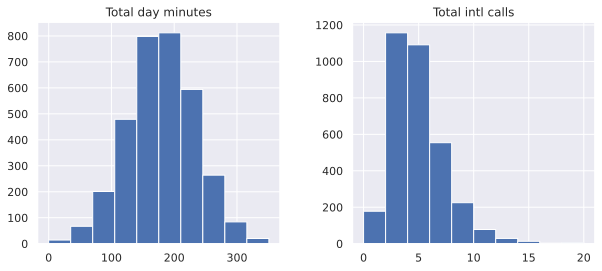

In [9]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

A histogram groups values into *bins* of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

In the above plot, we see that the variable *Total day minutes* is normally distributed, while *Total intl calls* is prominently skewed right (its tail is longer on the right).

There is also another, often clearer, way to grasp the distribution: *density plots* or, more formally, *Kernel Density Plots*. They can be considered a [smoothed](https://en.wikipedia.org/wiki/Kernel_smoother) version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let's create density plots for the same two variables:

Гистограмма группирует значения в *ячейки* одинакового диапазона значений. Форма гистограммы может содержать подсказки об основном типе распределения: гауссовском, экспоненциальном и т. д. Вы также можете заметить любую асимметрию в ее форме, когда распределение почти регулярное, но имеет некоторые аномалии. Знание распределения значений признаков становится важным, когда вы используете методы машинного обучения, которые предполагают определенный тип (чаще всего гауссов).

На приведенном выше графике мы видим, что переменная *Общее количество минут в день* имеет нормальное распределение, тогда как *Общее количество международных вызовов* заметно скошено вправо (ее хвост справа длиннее).

Существует также другой, часто более понятный способ понять распределение: *графики плотности* или, более формально, *графики плотности ядра*. Их можно считать [сглаженной](https://en.wikipedia.org/wiki/Kernel_smoother) версией гистограммы. Их главное преимущество перед последними в том, что они не зависят от размеров бункеров. Давайте создадим графики плотности для тех же двух переменных:

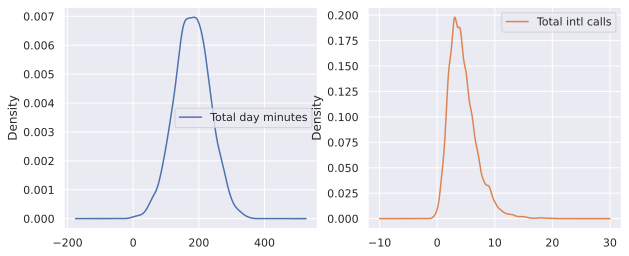

In [12]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

It is also possible to plot a distribution of observations with `seaborn`'s [`distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html). For example, let's look at the distribution of *Total day minutes*. By default, the plot displays the histogram with the [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) on top.

Также возможно построить график распределения наблюдений с помощью функции [`distplot()`] `seaborn` (https://seaborn.pydata.org/generated/seaborn.distplot.html). Например, давайте посмотрим на распределение *Общего количества минут*. По умолчанию на графике отображается гистограмма с [оценкой плотности ядра](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) вверху.

/tmp/ipykernel_20432/2381786444.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Total intl calls"]);


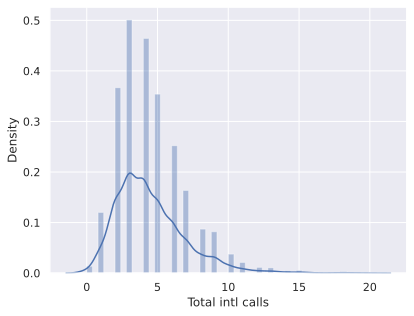

In [16]:
sns.distplot(df["Total intl calls"]);
# sns.displot(df["Total intl calls"]);
# sns.histplot(df["Total intl calls"]);


The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

##### Box plot

Another useful type of visualization is a *box plot*. `seaborn` does a great job here:

Высота столбцов гистограммы здесь нормирована и показывает плотность, а не количество примеров в каждом интервале.

##### Коробочный сюжет

Еще один полезный тип визуализации — ящичная диаграмма. `seaborn` отлично справляется со своей задачей:

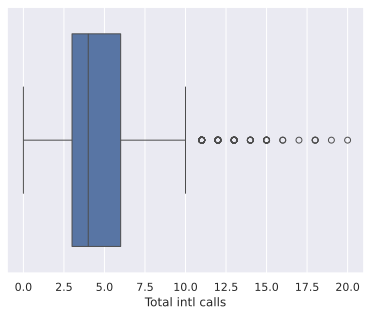

In [17]:
sns.boxplot(x="Total intl calls", data=df);

Let's see how to interpret a box plot. Its components are a *box* (obviously, this is why it is called a *box plot*), the so-called *whiskers*, and a number of individual points (*outliers*).

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the $25th \, (\text{Q1})$ and $75th \, (\text{Q3})$ percentiles. The vertical line inside the box marks the median ($50\%$) of the distribution. 

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, where $\text{IQR} = \text{Q3} - \text{Q1}$ is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range).

Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of international calls is quite rare in our data.

##### Violin plot

The last type of distribution plots that we will consider is a *violin plot*.

Look at the figures below. On the left, we see the already familiar box plot. To the right, there is a *violin plot* with the kernel density estimate on both sides.

Давайте посмотрим, как интерпретировать коробчатую диаграмму. Ее составляющими являются *коробка* (очевидно, поэтому она и называется *ящиком*), так называемые *усы* и ряд отдельных точек (*выбросов*).

Рамка сама по себе иллюстрирует межквартильный разброс распределения; его длина определяется $25-м \, (\text{Q1})$ и $75-м \, (\text{Q3})$ процентилями. Вертикальная линия внутри рамки обозначает медиану ($50\%$) распределения.

Усы — это линии, идущие от коробки. Они представляют собой весь разброс точек данных, а именно точки, попадающие в интервал $(\text{Q1} - 1,5 \cdot \text{IQR}, \text{Q3} + 1,5 \cdot \text{IQR})$ , где $\text{IQR} = \text{Q3} - \text{Q1}$ — это [межквартильный диапазон](https://en.wikipedia.org/wiki/Interquartile_range).

Выбросы, выходящие за пределы диапазона, ограниченного усами, наносятся индивидуально в виде черных точек вдоль центральной оси.

Мы видим, что большое количество международных звонков по нашим данным встречается довольно редко.

##### Скрипичный сюжет

Последний тип графиков распределения, который мы рассмотрим, — это *скрипичный сюжет*.

Посмотрите на цифры ниже. Слева мы видим уже знакомую коробчатую диаграмму. Справа находится *скрипичный график* с оценкой плотности ядра с обеих сторон.

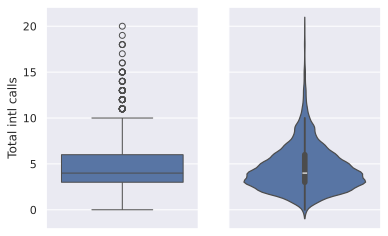

In [18]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

In our case, the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

##### describe()

In addition to graphical tools, in order to get the exact numerical statistics of the distribution, we can use the method [`describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) of a `DataFrame`:

Разница между графиками «ящик» и «скрипка» заключается в том, что первый иллюстрирует определенную статистику, касающуюся отдельных примеров в наборе данных, тогда как график «скрипка» больше концентрируется на сглаженном распределении в целом.

В нашем случае скрипичный график не дает никакой дополнительной информации о данных, поскольку все ясно только из коробчатого графика.

##### описывать()

Помимо графических инструментов, чтобы получить точную числовую статистику распределения, мы можем использовать метод [`describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas .DataFrame.describe.html) `DataFrame`:

In [19]:
df[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

Its output is mostly self-explanatory. *25%*, *50%* and *75%* are the corresponding [percentiles](https://en.wikipedia.org/wiki/Percentile).

Его вывод в основном не требует пояснений. *25%*, *50%* и *75%* — соответствующие [процентили](https://en.wikipedia.org/wiki/Percentile).

#### 2.2 Categorical and binary features

*Categorical features* take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a *category*, which reflects some qualitative property of this example. *Binary* variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called *ordinal*.

##### Frequency table

Let’s check the class balance in our dataset by looking at the distribution of the target variable: the *churn rate*. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method:


#### 2.2 Категориальные и бинарные функции

*Категорические признаки* принимают фиксированное количество значений. Каждое из этих значений относит наблюдение к соответствующей группе, известной как *категория*, которая отражает некоторое качественное свойство этого примера. *Бинарные* переменные — это важный частный случай категориальных переменных, когда число возможных значений равно ровно 2. Если значения категориальной переменной упорядочены, она называется *порядковой*.

##### Таблица частот

Давайте проверим баланс классов в нашем наборе данных, взглянув на распределение целевой переменной: *коэффициент оттока*. Сначала мы получим таблицу частот, которая показывает, насколько часто встречается каждое значение категориальной переменной. Для этого мы будем использовать метод [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html):

In [20]:
df["Churn"].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

By default, the entries in the output are sorted from the most to the least frequently-occurring values.

In our case, the data is not *balanced*; that is, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service. As we will see in the following articles, this fact may imply some restrictions on measuring the classification performance, and, in the future, we may want to additionally penalize our model errors in predicting the minority "Churn" class.


По умолчанию записи в выводе сортируются от наиболее часто встречающихся значений к наименее часто встречающимся.

В нашем случае данные не *сбалансированы*; то есть два наших целевых класса — лояльные и нелояльные клиенты — не представлены в наборе данных одинаково. Лишь небольшая часть клиентов отказалась от подписки на услугу связи. Как мы увидим в следующих статьях, этот факт может подразумевать некоторые ограничения на измерение эффективности классификации, и в будущем мы, возможно, захотим дополнительно наказывать ошибки нашей модели при прогнозировании класса «отток» меньшинства.

##### Bar plot

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the `seaborn`'s function [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html). There is another function in `seaborn` that is somewhat confusingly called [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

Let's plot the distributions for two categorical variables:


##### Барный сюжет

Гистограмма представляет собой графическое представление таблицы частот. Самый простой способ создать его — использовать функцию seaborn [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html). В `seaborn` есть ещё одна функция, которая несколько сбивает с толку названием [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) и в основном используется для представления некоторой базовой статистики числовая переменная, сгруппированная по категориальному признаку.

Давайте построим распределения для двух категориальных переменных:

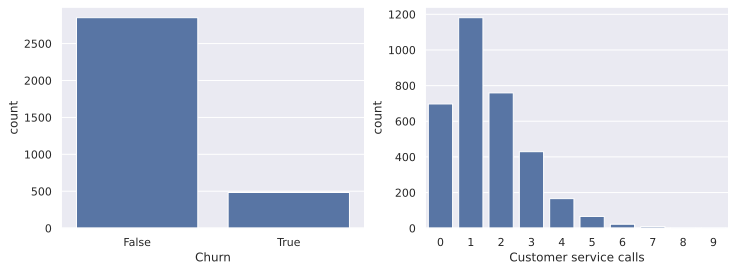

In [21]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:
1. *Histograms* are best suited for looking at the distribution of numerical variables while *bar plots* are used for categorical features.
2. The values on the X-axis in the *histogram* are numerical; a *bar plot* can have any type of values on the X-axis: numbers, strings, booleans.
3. The *histogram*'s X-axis is a *Cartesian coordinate axis* along which values cannot be changed; the ordering of the *bars* is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider *ordinal* variables (like *Customer service calls* in our data), the bars are usually ordered by variable value.

The left chart above vividly illustrates the imbalance in our target variable. The bar plot for *Customer service calls* on the right gives a hint that the majority of customers resolve their problems in maximum 2–3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques.


Хотя гистограммы, рассмотренные выше, и гистограммы могут выглядеть одинаково, между ними есть несколько различий:
1. *Гистограммы* лучше всего подходят для изучения распределения числовых переменных, тогда как *столбчатые графики* используются для категориальных признаков.
2. Значения по оси X на *гистограмме* являются числовыми; *Гистограмма* может иметь любые типы значений по оси X: числа, строки, логические значения.
3. Ось X *гистограммы* представляет собой *ось декартовых координат*, значения вдоль которой не могут быть изменены; порядок *баров* не предопределен. Тем не менее, полезно отметить, что столбцы часто сортируются по высоте, то есть частоте значений. Кроме того, когда мы рассматриваем *порядковые* переменные (например, *Звонки в службу поддержки* в наших данных), столбцы обычно упорядочены по значению переменной.

Левый график выше наглядно иллюстрирует дисбаланс нашей целевой переменной. Гистограмма *Звонки в службу поддержки* справа дает понять, что большинство клиентов решают свои проблемы максимум за 2–3 звонка. Но поскольку мы хотим иметь возможность предсказать класс меньшинства, нас может больше интересовать то, как ведет себя меньшее количество недовольных клиентов. Вполне возможно, что в хвосте этого столбчатого графика находится большая часть нашего оттока. Пока это всего лишь гипотезы, поэтому давайте перейдем к более интересным и мощным визуальным приемам.

## 3. Multivariate visualization

*Multivariate* plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

#### 3.1 Quantitative vs. Quantitative

##### Correlation matrix

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) on a `DataFrame` that calculates the correlation between each pair of features. Then, we pass the resulting *correlation matrix* to [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from `seaborn`, which renders a color-coded matrix for the provided values:


## 3. Многомерная визуализация

*Многомерные* графики позволяют нам видеть взаимосвязи между двумя и более различными переменными на одном рисунке. Как и в случае с одномерными графиками, конкретный тип визуализации будет зависеть от типов анализируемых переменных.

#### 3.1 Количественный и количественный методы

##### Корреляционная матрица

Давайте посмотрим на корреляции между числовыми переменными в нашем наборе данных. Эту информацию важно знать, поскольку существуют алгоритмы машинного обучения (например, линейная и логистическая регрессия), которые плохо обрабатывают сильно коррелированные входные переменные.

Сначала мы будем использовать метод [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) для DataFrame, который вычисляет корреляцию. между каждой парой функций. Затем мы передаем полученную *матрицу корреляции* в [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) из `seaborn`, которая отображает матрицу с цветовой кодировкой для предоставленные значения:

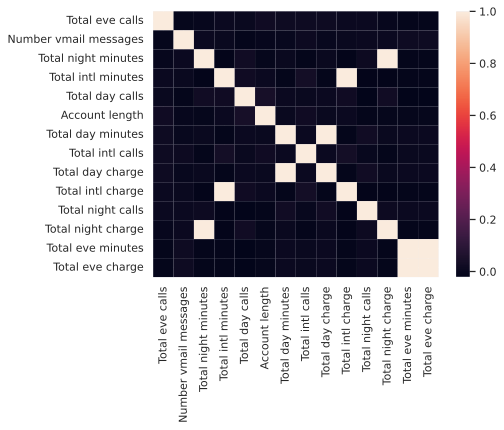

In [22]:
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

From the colored correlation matrix generated above, we can see that there are 4 variables such as *Total day charge* that have been calculated directly from the number of minutes spent on phone calls (*Total day minutes*). These are called *dependent* variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:


Из цветной корреляционной матрицы, созданной выше, мы видим, что существует 4 переменные, такие как *Общая дневная плата*, которые рассчитываются непосредственно на основе количества минут, потраченных на телефонные звонки (*Общее количество минут*). Они называются *зависимыми* переменными и поэтому могут быть опущены, поскольку они не несут никакой дополнительной информации. Давайте избавимся от них:

In [23]:
numerical = list(
    set(numerical)
    - set(
        [
            "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
        ]
    )
)

##### Scatter plot

The *scatter plot* displays values of two numerical variables as *Cartesian coordinates* in 2D space. Scatter plots in 3D are also possible.

Let's try out the function [`scatter()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) from the `matplotlib` library:


##### График рассеяния

На *диаграмме рассеяния* отображаются значения двух числовых переменных в виде *декартовых координат* в 2D-пространстве. Также возможны точечные диаграммы в 3D.

Давайте попробуем функцию [`scatter()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) из библиотеки `matplotlib`:

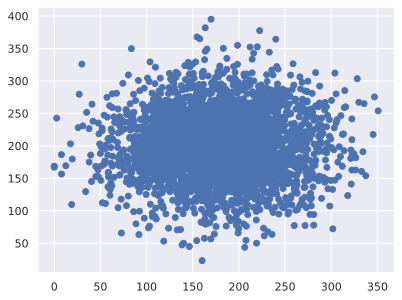

In [24]:
plt.scatter(df["Total day minutes"], df["Total night minutes"]);

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the `seaborn` library:


Получаем неинтересную картину двух нормально распределенных переменных. Кроме того, кажется, что эти функции не коррелируют, поскольку эллипсоподобная форма выровнена по осям.

Есть немного более интересный вариант создания диаграммы рассеяния с помощью библиотеки `seaborn`:

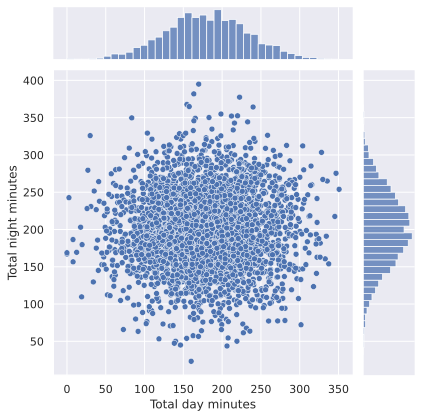

In [25]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

The function [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) plots two histograms that may be useful in some cases.

Using the same function, we can also get a smoothed version of our bivariate distribution:


Функция `Jointplot()` строит две гистограммы, которые могут быть полезны в некоторых случаях.
Используя ту же функцию, мы также можем получить сглаженную версию нашего двумерного распределения:

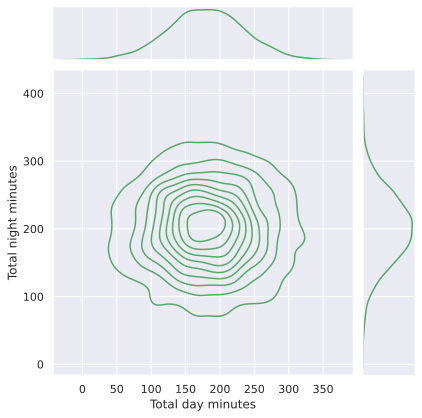

In [27]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="kde", color="g"
);

This is basically a bivariate version of the *Kernel Density Plot* discussed earlier.

##### Scatterplot matrix

In some cases, we may want to plot a *scatterplot matrix* such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.


По сути, это двумерная версия *графика плотности ядра*, обсуждавшегося ранее.

##### Матрица рассеяния

В некоторых случаях нам может потребоваться построить *матрицу диаграммы рассеяния*, например, показанную ниже. Ее диагональ содержит распределения соответствующих переменных, а диаграммы рассеяния для каждой пары переменных заполняют остальную часть матрицы.

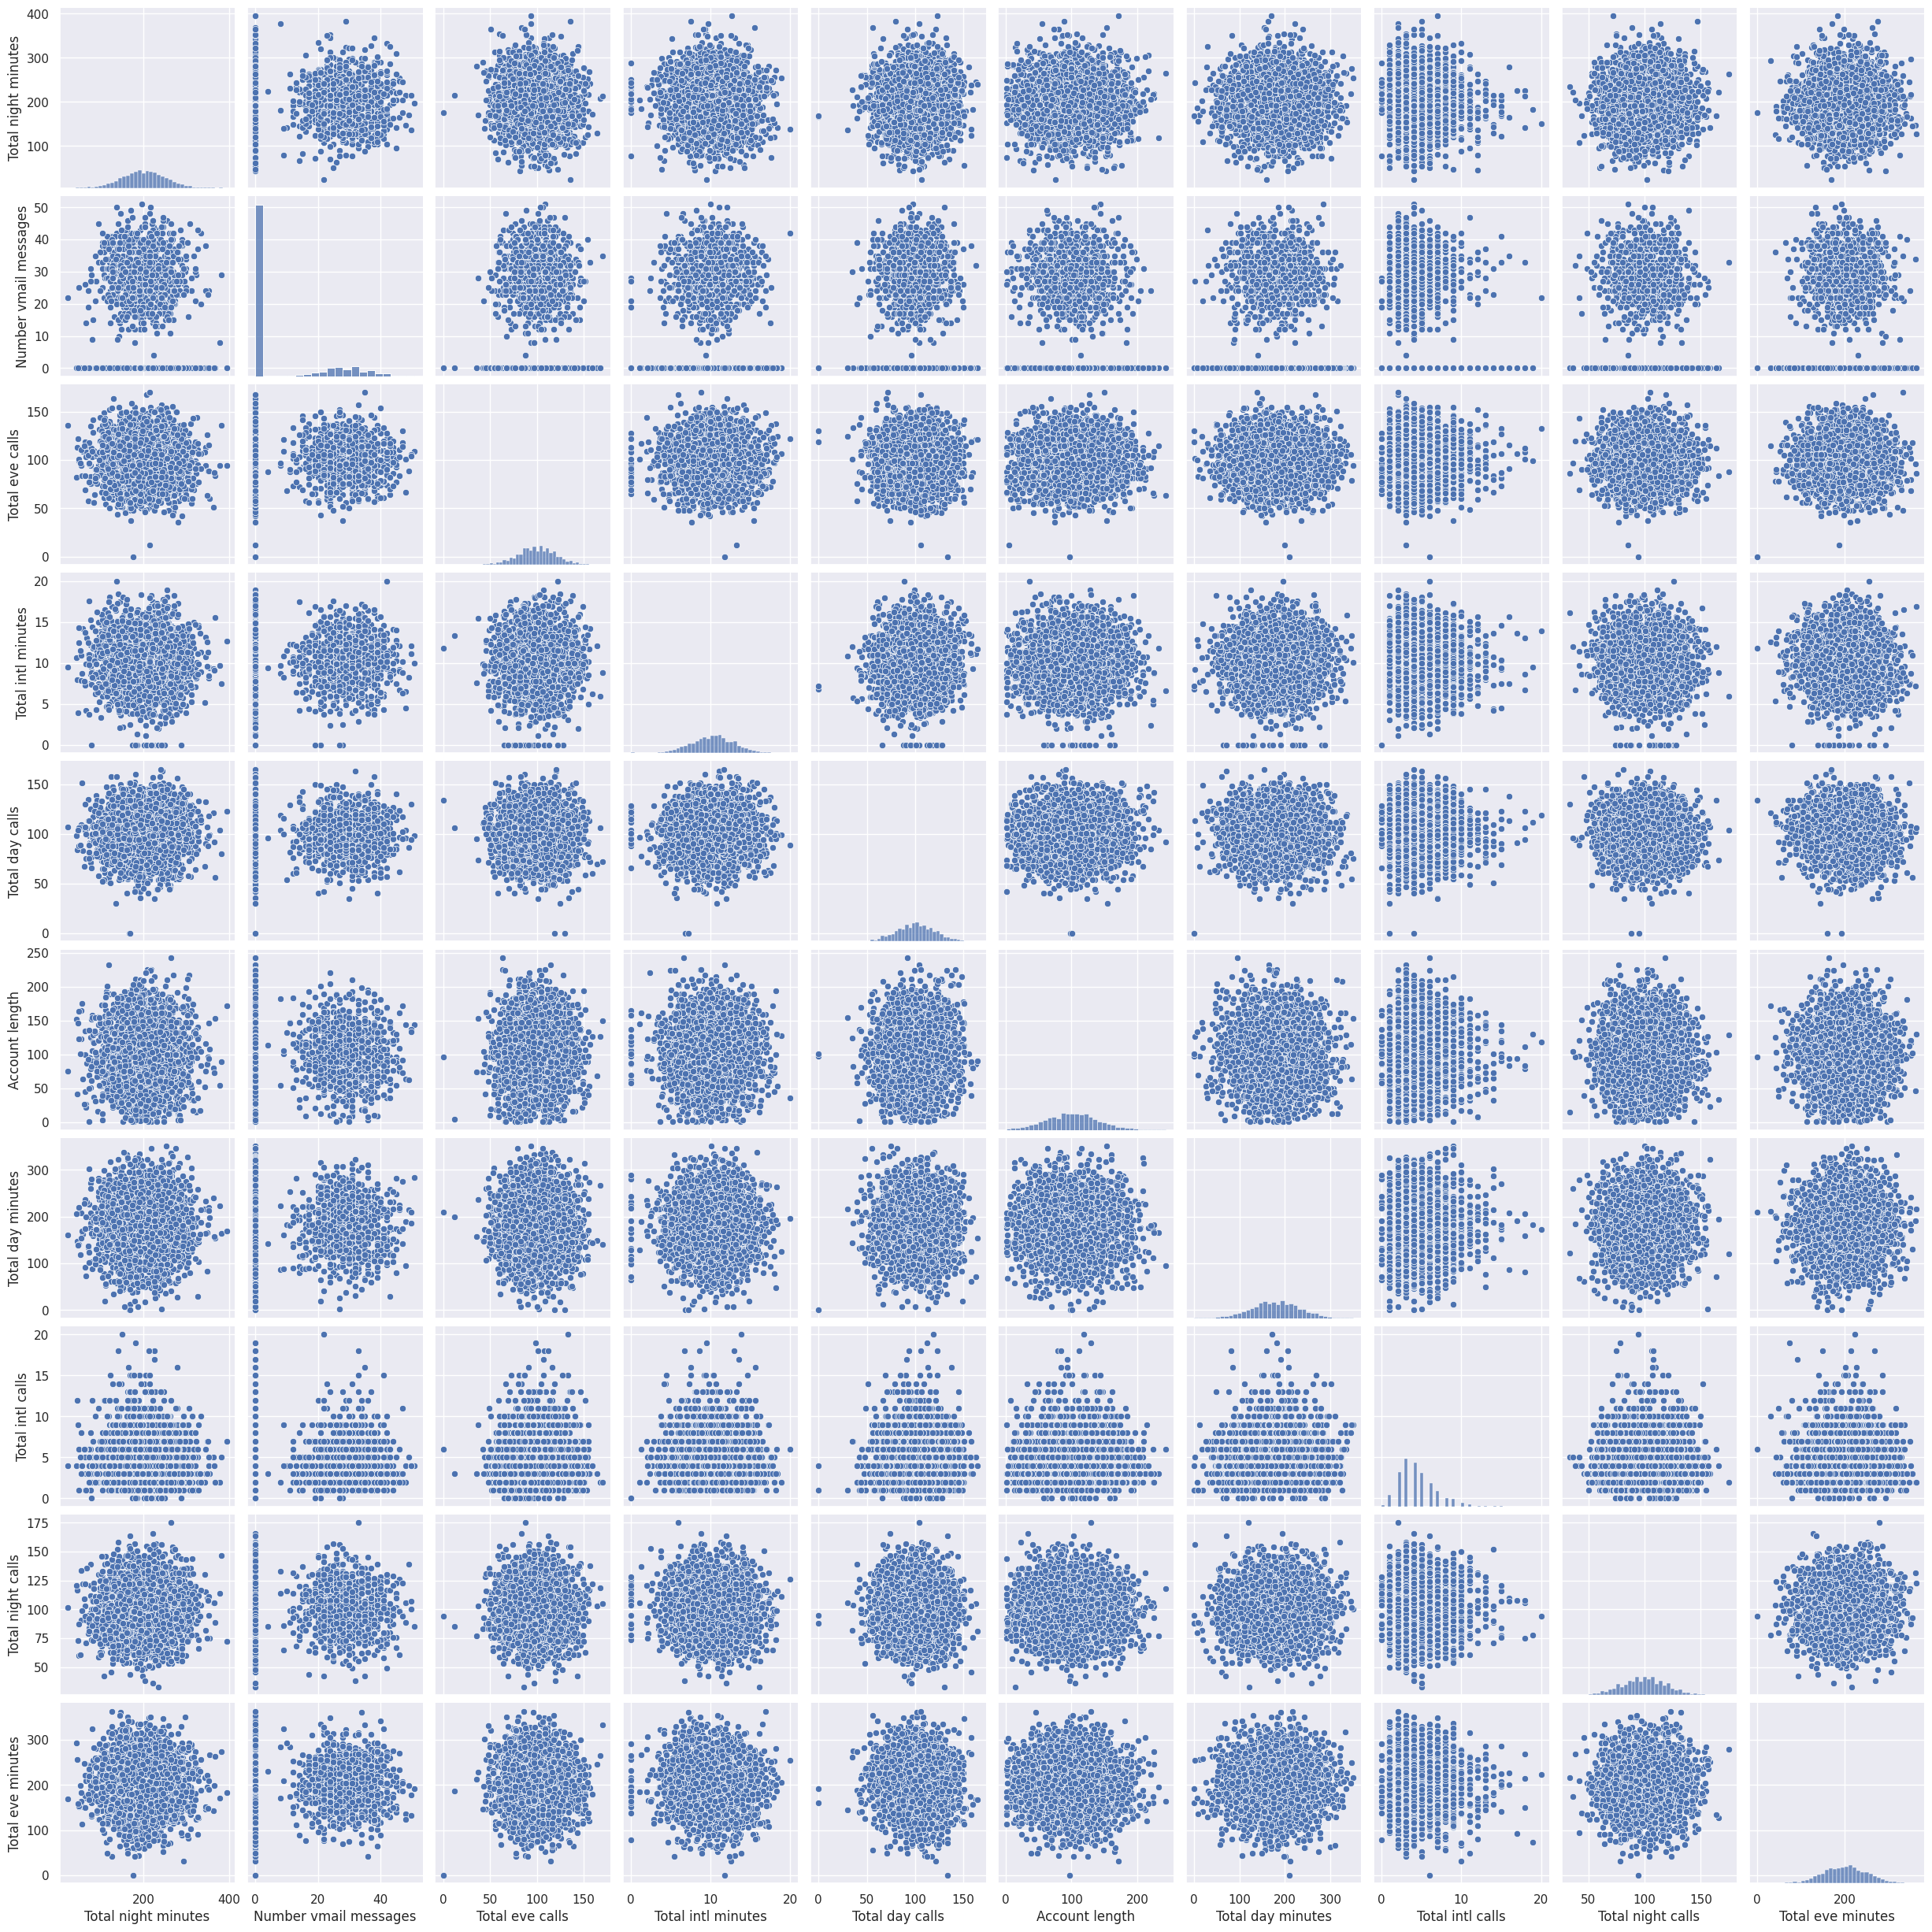

In [28]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [29]:
%config InlineBackend.figure_format = 'svg'

Sometimes, such a visualization may help draw conclusions about data; but, in this case, everything is pretty clear with no surprises.

#### 3.2 Quantitative vs. Categorical

In this section, we will make our simple quantitative plots a little more exciting. We will try to gain new insights for churn prediction from the interactions between the numerical and categorical features.

More specifically, let's see how the input variables are related to the target variable Churn.

Previously, you learned about scatter plots. Additionally, their points can be color or size coded so that the values of a third categorical variable are also presented in the same figure. We can achieve this with the `scatter()` function seen above, but, let's try a new function called [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) and use the parameter `hue` to indicate our categorical feature of interest:


Иногда такая визуализация может помочь сделать выводы о данных; но в данном случае все довольно ясно и без сюрпризов.

#### 3.2 Количественный и категориальный

В этом разделе мы сделаем наши простые количественные графики немного более интересными. Мы попытаемся получить новую информацию о прогнозировании оттока клиентов на основе взаимодействия числовых и категориальных характеристик.

Более конкретно, давайте посмотрим, как входные переменные связаны с целевой переменной Churn.

Ранее вы узнали о диаграммах рассеяния. Кроме того, их точки могут быть закодированы цветом или размером, чтобы значения третьей категориальной переменной также были представлены на том же рисунке. Мы можем добиться этого с помощью функции `scatter()`, показанной выше, но давайте попробуем новую функцию под названием [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) и используйте параметр «hue», чтобы указать интересующую нас категориальную особенность:

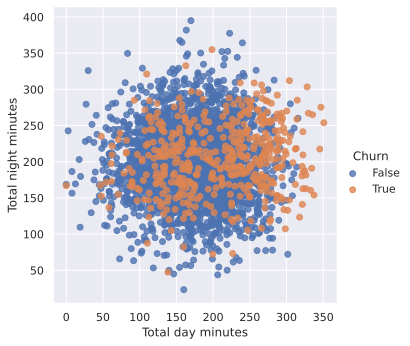

In [30]:
sns.lmplot(x="Total day minutes", y="Total night minutes", data=df, hue="Churn", fit_reg=False
);

It seems that our small proportion of disloyal customers lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night. But this is not absolutely clear, and we won't make any definitive conclusions from this chart.

Now, let’s create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (`Churn=False`) and those who left (`Churn=True`).


Кажется, что наша небольшая часть нелояльных клиентов склоняется к верхнему правому углу; то есть такие клиенты, как правило, проводят больше времени на телефоне как днем, так и ночью. Но это не совсем ясно, и никаких однозначных выводов из этого графика мы делать не будем.

Теперь давайте создадим коробчатые диаграммы, чтобы визуализировать статистику распределения числовых переменных в двух непересекающихся группах: лояльных клиентов (`Отток = False`) и тех, кто ушел (`Отток = True`).

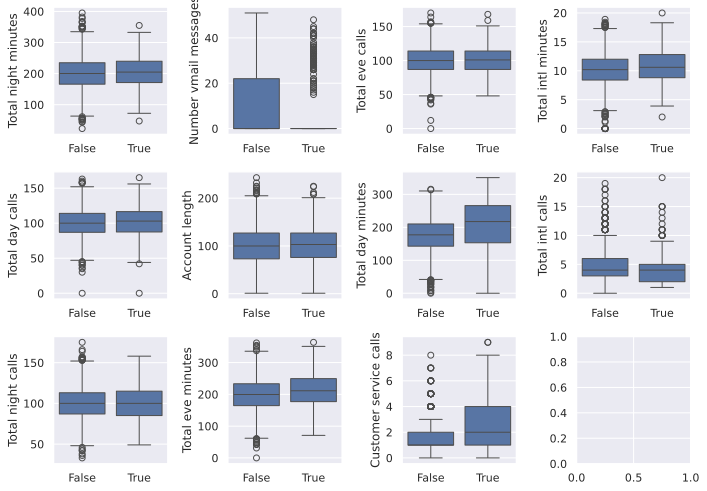

In [31]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

From this chart, we can see that the greatest discrepancy in distribution between the two groups is for three variables: *Total day minutes*, *Customer service calls*, and *Number vmail messages*. Later in this course, we will learn how to determine feature importance in classification using *Random Forest* or *Gradient Boosting*; there, we will see that the first two features are indeed very important for churn prediction.

Let's look at the distribution of day minutes spoken for the loyal and disloyal customers separately. We will create box and violin plots for *Total day minutes* grouped by the target variable.


На этой диаграмме мы видим, что наибольшее расхождение в распределении между двумя группами наблюдается по трем переменным: *Общее количество минут в день*, *Звонки в службу поддержки* и *Количество сообщений электронной почты*. Позже в этом курсе мы научимся определять важность признаков при классификации с помощью *Случайного леса* или *Gradient Boosting*; там мы увидим, что первые две функции действительно очень важны для прогнозирования оттока.

Рассмотрим распределение дневных разговоров для лояльных и нелояльных клиентов отдельно. Мы создадим графики «коробка» и «скрипка» для *Общего количества минут*, сгруппированные по целевой переменной.

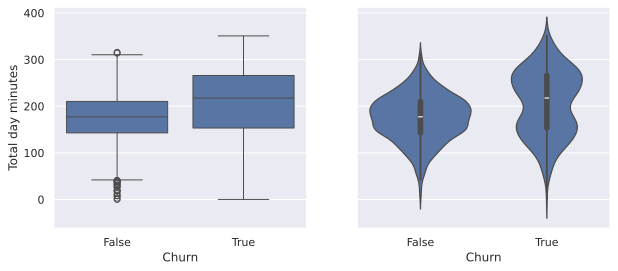

In [32]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

In this case, the violin plot does not contribute any additional information about our data as everything is clear from the box plot alone: disloyal customers tend to talk on the phone more.

**An interesting observation**: on average, customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the `seaborn` library called [`catplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html). For example, let's visualize the interaction between *Total day minutes* and two categorical variables in the same plot:


В данном случае график «скрипка» не несет никакой дополнительной информации о наших данных, поскольку все ясно из одного только коробчатого графика: нелояльные клиенты склонны больше разговаривать по телефону.

**Интересное наблюдение**: в среднем клиенты, расторгающие договоры, являются более активными пользователями услуг связи. Возможно, они недовольны тарифами, поэтому возможной мерой предотвращения оттока может стать снижение тарифов на звонки. Компании необходимо будет провести дополнительный экономический анализ, чтобы выяснить, принесут ли такие меры пользу.

Когда мы хотим проанализировать количественную переменную сразу в двух категориальных измерениях, в библиотеке seaborn для этого есть подходящая функция под названием [`catplot()`](https://seaborn.pydata.org/generated/seaborn). .factorplot.html). Например, давайте визуализируем взаимодействие между *Общим количеством минут* и двумя категориальными переменными на одном графике:

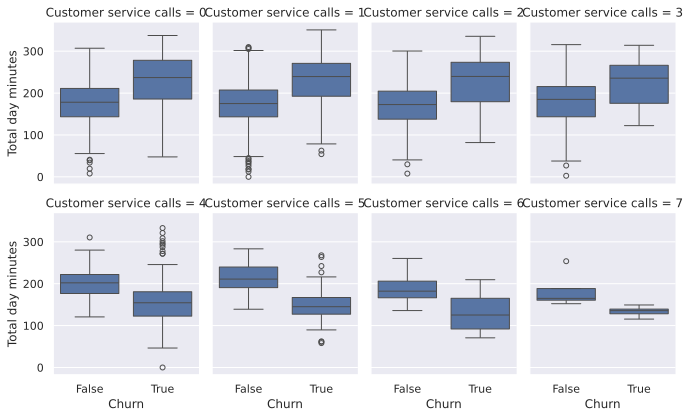

In [33]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);

From this, we could conclude that, starting with 4 calls, *Total day minutes* may no longer be the main factor for customer churn. Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

#### 3.3 Categorical vs. Categorical

As we saw earlier in this article, the variable *Customer service calls* has few unique values and, thus, can be considered either numerical or ordinal. We have already seen its distribution with a *count plot*. Now, we are interested in the relationship between this ordinal feature and the target variable *Churn*.

Let's look at the distribution of the number of calls to customer service, again using a *count plot*. This time, let's also pass the parameter `hue=Churn` that adds a categorical dimension to the plot:


Из этого мы можем сделать вывод, что, начиная с 4 звонков, *Общее количество минут в день* больше не может быть основным фактором оттока клиентов. Возможно, помимо наших предыдущих предположений о тарифах, есть клиенты, недовольные сервисом из-за других проблем, которые могут привести к меньшему количеству дневных минут, потраченных на разговоры.

#### 3.3 Категориальные и категориальные

Как мы видели ранее в этой статье, переменная *Звонки в службу поддержки* имеет мало уникальных значений и поэтому может считаться либо числовой, либо порядковой. Мы уже видели его распределение на *графике*. Теперь нас интересует связь между этим порядковым признаком и целевой переменной *Churn*.

Давайте посмотрим на распределение количества обращений в службу поддержки клиентов, снова используя *график подсчета*. На этот раз давайте также передадим параметр hue=Churn, который добавляет к графику категориальное измерение:

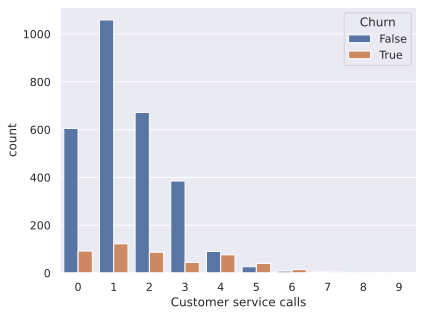

In [34]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

**An observation**: the churn rate increases significantly after 4 or more calls to customer service.

Now, let's look at the relationship between *Churn* and the binary features, *International plan* and *Voice mail plan*.


**Наблюдение**: уровень оттока значительно увеличивается после 4 и более звонков в службу поддержки.

Теперь давайте посмотрим на взаимосвязь между *Оттоком* и двоичными функциями *Международный план* и *План голосовой почты*.

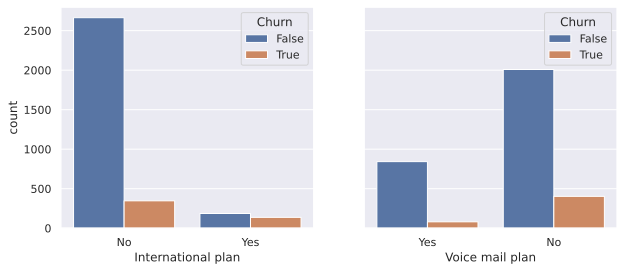

In [35]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);

**An observation**: when *International Plan* is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with *Voice mail plan*.

##### Contingency table

In addition to using graphical means for categorical analysis, there is a traditional tool from statistics: a *contingency table*, also called a *cross tabulation*. It shows a multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

Let's try to see how *Churn* is related to the categorical variable *State* by creating a cross tabulation:


**Наблюдение**: когда включен *Международный план*, уровень оттока клиентов намного выше; Использование международного плана клиентом является сильной стороной. Мы не наблюдаем такого же эффекта при использовании *плана голосовой почты*.

##### Таблица сопряженности

Помимо использования графических средств для категориального анализа, существует традиционный инструмент статистики: *таблица непредвиденных обстоятельств*, также называемая *перекрестной таблицей*. Он показывает многомерное распределение частот категориальных переменных в табличной форме. В частности, это позволяет нам увидеть распределение одной переменной в зависимости от другой, просматривая столбец или строку.

Давайте попробуем увидеть, как *Churn* связано с категориальной переменной *State*, создав перекрестную таблицу:

In [36]:
pd.crosstab(df["State"], df["Churn"]).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In the case of *State*, the number of distinct values is rather high: 51. We see that there are only a few data points available for each individual state – only 3 to 17 customers in each state abandoned the operator. Let's ignore that for a second and calculate the churn rate for each state, sorting it from high to low:


В случае *State* количество различных значений довольно велико: 51. Мы видим, что для каждого отдельного штата доступно лишь несколько точек данных – только от 3 до 17 клиентов в каждом штате отказались от оператора. Давайте на секунду проигнорируем это и посчитаем уровень оттока для каждого штата, отсортировав его от высокого к меньшему:

In [38]:
df.groupby(["State"])["Churn"].agg(["mean"]).sort_values(by="mean", ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

At first glance, it seems that the churn rate in *New Jersey* and *California* are above 25% and less than 6% for Hawaii and Alaska. However, these conclusions are based on too few examples, and our observation could be a mere property of our particular dataset. We can confirm this with the [Matthews](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient) and [Cramer](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) correlation hypotheses, but this would be beyond the scope of this article.


На первый взгляд кажется, что уровень оттока клиентов в *Нью-Джерси* и *Калифорнии* превышает 25%, а на Гавайях и Аляске — менее 6%. Однако эти выводы основаны на слишком небольшом количестве примеров, и наше наблюдение может быть просто свойством нашего конкретного набора данных. Мы можем подтвердить это с помощью корреляции [Мэттьюза](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient) и [Креймера](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V). гипотезы, но это выходит за рамки данной статьи.

## 4. Whole dataset visualizations


## 4. Визуализация всего набора данных

#### 4.1 A naive approach

We have been looking at different *facets* of our dataset by guessing interesting features and selecting a small number of them at a time for visualization. We have only dealt with two to three variables at once and were easily able to observe the structure and relationships in data. But, what if we want to display all the features and still be able to interpret the resulting visualization?

We could use `hist()` or create a scatterplot matrix with `pairplot()` for the whole dataset to look at all of our features simultaneously. But, when the number of features is high enough, this kind of visual analysis quickly becomes slow and inefficient. Besides, we would still be analyzing our variables in a pairwise fashion, not all at once.



#### 4.1 Наивный подход

Мы рассматривали различные *аспекты* нашего набора данных, угадывая интересные особенности и выбирая небольшое их количество одновременно для визуализации. Мы имели дело только с двумя-тремя переменными одновременно и могли легко наблюдать структуру и взаимосвязи в данных. Но что, если мы хотим отобразить все функции и при этом иметь возможность интерпретировать полученную визуализацию?

Мы могли бы использовать hist() или создать матрицу диаграммы рассеяния с помощью pairplot() для всего набора данных, чтобы одновременно рассматривать все наши функции. Но когда количество функций достаточно велико, такой визуальный анализ быстро становится медленным и неэффективным. Кроме того, мы все равно будем анализировать переменные попарно, а не все сразу.

#### 4.2 Dimensionality reduction

Most real-world datasets have many features, sometimes, many thousands of them. Each of them can be considered as a dimension in the space of data points. Consequently, more often than not, we deal with high-dimensional datasets, where entire visualization is quite hard.

To look at a dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about the data. This task is called *dimensionality reduction* and is an example of an *unsupervised learning* problem because we need to derive new, low-dimensional features from the data itself, without any supervised input.

One of the well-known dimensionality reduction methods is *Principal Component Analysis* (PCA), which we will study later in this course. Its limitation is that it is a *linear* algorithm that implies certain restrictions on the data.

There are also many non-linear methods, collectively called *Manifold Learning*. One of the best-known of them is *t-SNE*.



#### 4.2 Уменьшение размерности

Большинство реальных наборов данных имеют множество функций, иногда многие тысячи. Каждый из них можно рассматривать как измерение в пространстве точек данных. Следовательно, чаще всего мы имеем дело с многомерными наборами данных, вся визуализация которых довольно сложна.

Чтобы взглянуть на набор данных в целом, нам нужно уменьшить количество измерений, используемых при визуализации, не теряя при этом много информации о данных. Эта задача называется *уменьшением размерности* и является примером проблемы *неконтролируемого обучения*, поскольку нам нужно получить новые низкоразмерные функции из самих данных без какого-либо контролируемого ввода.

Одним из хорошо известных методов уменьшения размерности является *Анализ главных компонентов* (PCA), который мы изучим позже в этом курсе. Его ограничением является то, что это *линейный* алгоритм, подразумевающий определенные ограничения на данные.

Существует также множество нелинейных методов, которые в совокупности называются *Многообразное обучение*. Один из самых известных из них — *t-SNE*.

#### 4.3 t-SNE

Let’s create a [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) representation of the same churn data we have been using. 

The name of the method looks complex and a bit intimidating: *t-distributed Stochastic Neighbor Embedding*. Its math is also impressive (we will not delve into it here, but, if you feel brave, here is the [original article](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) by Laurens van der Maaten and Geoffrey Hinton from [JMLR](http://www.jmlr.org/)). Its basic idea is simple: find a projection for a high-dimensional feature space onto a plane (or a 3D hyperplane, but it is almost always 2D) such that those points that were far apart in the initial n-dimensional space will end up far apart on the plane. Those that were originally close would remain close to each other.

Essentially, *neighbor embedding* is a search for a new and less-dimensional data representation that preserves neighborship of examples.

Now, let's do some practice. First, we need to import some additional classes:



#### 4.3 т-СНЭ

Давайте создадим [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) представление тех же данных об оттоке, которые мы использовали.

Название метода выглядит сложным и немного пугающим: *t-распределенное встраивание стохастических соседей*. Его математика также впечатляет (мы не будем здесь вдаваться в подробности, но, если вы смелы, вот [оригинальная статья](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) автора Лоренс ван дер Маатен и Джеффри Хинтон из [JMLR] (http://www.jmlr.org/)). Его основная идея проста: найти проекцию многомерного пространства признаков на плоскость (или трехмерную гиперплоскость, но она почти всегда двумерная) такую, что те точки, которые были далеко друг от друга в исходном n-мерном пространстве, в конечном итоге окажутся далеко друг от друга в самолете. Те, кто изначально были близки, останутся близкими друг другу.

По сути, *встраивание соседей* — это поиск нового и менее размерного представления данных, сохраняющего соседство примеров.

Теперь давайте немного попрактикуемся. Во-первых, нам нужно импортировать несколько дополнительных классов:

In [39]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

We will leave out the *State* and *Churn* features and convert the values "Yes"/"No" of the binary features into numerical values using [`pandas.Series.map()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html):


Мы оставим функции *State* и *Churn* и преобразуем значения «Да»/«Нет» двоичных функций в числовые значения с помощью [`pandas.Series.map()`](http://pandas. pydata.org/pandas-docs/stable/generated/pandas.Series.map.html):

In [40]:
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

We also need to normalize the data. For this, we will subtract the mean from each variable and divide it by its standard deviation. All of this can be done with `StandardScaler`.


Нам также необходимо нормализовать данные. Для этого мы вычтем среднее значение из каждой переменной и разделим его на ее стандартное отклонение. Все это можно сделать с помощью StandardScaler.

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now, let's build a t-SNE representation:


Теперь давайте построим представление t-SNE:

In [43]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 34.5 s, sys: 189 ms, total: 34.7 s
Wall time: 8.79 s


and plot it:


и постройте его:

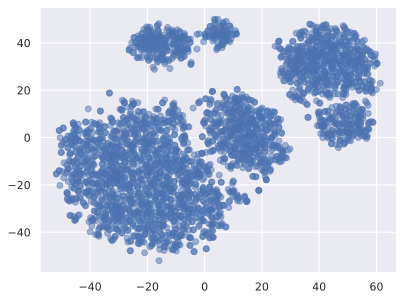

In [44]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

Let’s color this t-SNE representation according to the churn (blue for loyal customers, and orange for those who churned).


Давайте раскрасим это представление t-SNE в соответствии с оттоком (синий для постоянных клиентов и оранжевый для тех, кто ушел).

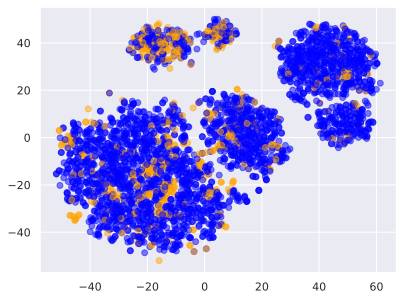

In [45]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);

We can see that customers who churned are concentrated in a few areas of the lower dimensional feature space.

To better understand the picture, we can also color it with the remaining binary features: *International Plan* and *Voicemail*. Orange dots here indicate instances that are positive for the corresponding binary feature.


Мы видим, что ушедшие клиенты концентрируются в нескольких областях нижнего измерения пространства функций.

Чтобы лучше понять картину, мы также можем раскрасить ее оставшимися двоичными функциями: *Международный план* и *Голосовая почта*. Оранжевые точки здесь обозначают случаи, положительные для соответствующего бинарного признака.

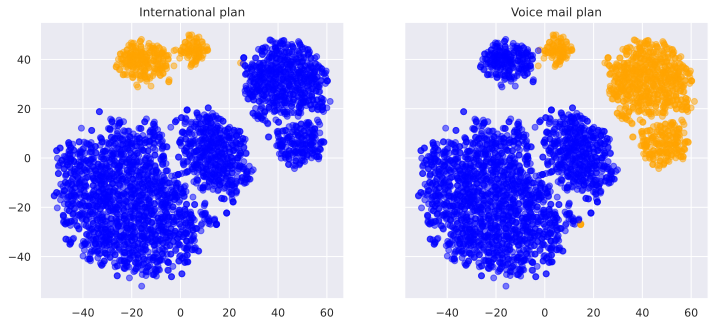

In [46]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);

Now it is clear that, for example, many dissatisfied customers who canceled their subscription are crowded together in one cluster representing the people with the international plan but no voice mail.

Finally, let's note some disadvantages of t-SNE:
- High computational complexity. The [implementation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) in `scikit-learn` is unlikely to be feasible in a real task. If you have a large number of samples, you should try [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE) instead.
- The plot can change a great deal depending on the random seed, which complicates interpretation. [Here](http://distill.pub/2016/misread-tsne/) is a good tutorial on t-SNE. In general, you shouldn’t make any far-reaching conclusions based on such graphs because it can equate to plain guessing. Of course, some findings in t-SNE pictures can inspire an idea and be confirmed through more thorough research down the line, but that does not happen very often.

Occasionally, using t-SNE, you can get a really good intuition for the data. The following is a good paper that shows an example of this for handwritten digits: [Visualizing MNIST](https://colah.github.io/posts/2014-10-Visualizing-MNIST/).

<img src='../../img/tsne_mnist.png' />


Теперь ясно, что, например, множество недовольных клиентов, отменивших подписку, собраны в один кластер, представляющий людей с международным тарифным планом, но без голосовой почты.

Наконец, отметим некоторые недостатки t-SNE:
- Высокая вычислительная сложность. [Реализация](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) в `scikit-learn` вряд ли будет осуществима в реальной задаче. Если у вас большое количество сэмплов, попробуйте вместо этого [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE).
- Сюжет может сильно меняться в зависимости от случайного сида, что усложняет интерпретацию. [Здесь](http://distill.pub/2016/misread-tsne/) — хорошее руководство по t-SNE. В общем, не стоит делать на основе таких графиков каких-то далеко идущих выводов, поскольку это может быть приравнено к простому догадке. Конечно, некоторые результаты на изображениях t-SNE могут вдохновить на идею и быть подтверждены посредством более тщательных исследований в дальнейшем, но это случается не очень часто.

Иногда, используя t-SNE, вы можете получить действительно хорошее представление о данных. Ниже приведен хороший документ, в котором показан пример рукописных цифр: [Визуализация MNIST] (https://colah.github.io/posts/2014-10-Visualizing-MNIST/).

<img src='../../img/tsne_mnist.png' />

## 5. Demo assignment
To practice with visual data analysis, you can complete [this assignment](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data) where you'll be analyzing cardiovascular disease data.


## 5. Демонстрационное задание
Чтобы попрактиковаться в визуальном анализе данных, вы можете выполнить [это задание] (https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardioglass-data), где вы будете анализировать данные о сердечно-сосудистых заболеваниях.

## 6. Useful resources
- The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
- ["Plotly for interactive plots"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/plotly_tutorial_for_interactive_plots_sankovalev.ipynb) - a tutorial by Alexander Kovalev within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
- ["Bring your plots to life with Matplotlib animations"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/bring_your_plots_to_life_with_matplotlib_animations_kyriacos_kyriacou.ipynb) - a tutorial by Kyriacos Kyriacou within mlcourse.ai
- ["Some details on Matplotlib"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/some_details_in_matplotlib_pisarev_ivan.ipynb) - a tutorial by Ivan Pisarev within mlcourse.ai
- Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd) based on this notebook
- Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/323210/) on Habrahabr with ~ the same material. And a [lecture](https://youtu.be/vm63p8Od0bM) on YouTube
- Here is the official documentation for the libraries we used: [`matplotlib`](https://matplotlib.org/contents.html), [`seaborn`](https://seaborn.pydata.org/introduction.html) and [`pandas`](https://pandas.pydata.org/pandas-docs/stable/).
- The [gallery](http://seaborn.pydata.org/examples/index.html) of sample charts created with `seaborn` is a very good resource.
- Also, see the [documentation](http://scikit-learn.org/stable/modules/manifold.html) on Manifold Learning in `scikit-learn`.
- Efficient t-SNE implementation [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE).
- "How to Use t-SNE Effectively", [Distill.pub](https://distill.pub/2016/misread-tsne/).


## 6. Полезные ресурсы
- Тот же блокнот, что и интерактивный веб-интерфейс [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-anaанализ-in-python)
- ["Plotly для интерактивных графиков"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/plotly_tutorial_for_interactive_plots_sankovalev.ipynb) — учебник Александра Ковалёва в рамках mlcourse.ai (полный список руководств находится [здесь](https://mlcourse.ai/tutorials))
- ["Оживите свои графики с помощью анимации Matplotlib"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/bring_your_plots_to_life_with_matplotlib_animations_kyriacos_kyriacou.ipynb) - учебник Кириакоса Кириаку в рамках mlcourse.ai
- ["Некоторые подробности о Matplotlib"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/some_details_in_matplotlib_pisarev_ivan.ipynb) - учебник Ивана Писарева в рамках mlcourse.ai
- [сайт] основного курса (https://mlcourse.ai), [репозиторий курса] (https://github.com/Yorko/mlcourse.ai) и [канал] YouTube (https://www.youtube. com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- Средний ["история"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-anaлиз-in-python-846b989675cd) на основе этот блокнот
- Материалы курса в виде [набора данных Kaggle] (https://www.kaggle.com/kashnitsky/mlcourse).
— Если читать по-русски: [статья](https://habrahabr.ru/company/ods/blog/323210/) на Хабрахабре с ~ тем же материалом. И [лекция](https://youtu.be/vm63p8Od0bM) на YouTube
- Вот официальная документация по использованным нами библиотекам: [`matplotlib`](https://matplotlib.org/contents.html), [`seaborn`](https://seaborn.pydata.org/introduction.html ) и [`pandas`](https://pandas.pydata.org/pandas-docs/stable/).
- [Галерея](http://seaborn.pydata.org/examples/index.html) образцов диаграмм, созданных с помощью `seaborn`, является очень хорошим ресурсом.
- Также см. [документацию](http://scikit-learn.org/stable/modules/manifold.html) по многообразному обучению в `scikit-learn`.
- Эффективная реализация t-SNE [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE).
- «Как эффективно использовать t-SNE», [Distill.pub](https://distill.pub/2016/misread-tsne/).